In [106]:
# Importing the libraries
import sys

# Uncomment if not installed.
#!{sys.executable} -m pip install plotly
#!{sys.executable} -m pip install tensorflow keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import math
import shap
import sys
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_boston
from sklearn import metrics

%matplotlib inline

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 105 kB 1.3 MB/s eta 0:00:01


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [107]:
# The boston dataset.
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [108]:
# Initializing the dataframe
df = pd.DataFrame(boston.data)
df.shape

(506, 13)

In [109]:
# Adding the feature names to the dataframe
df.columns = boston.feature_names
df['MEDV'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


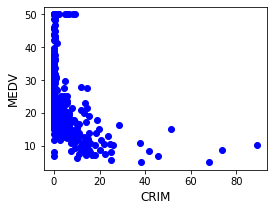

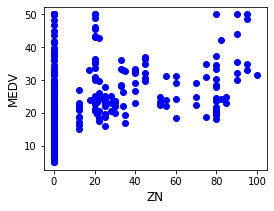

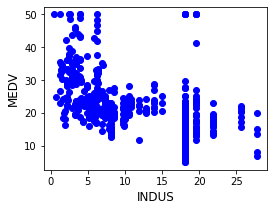

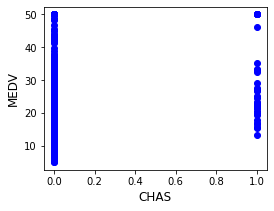

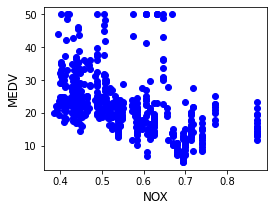

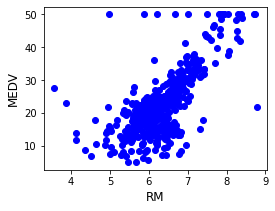

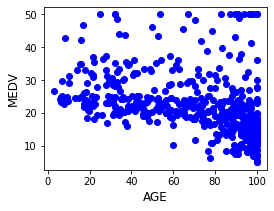

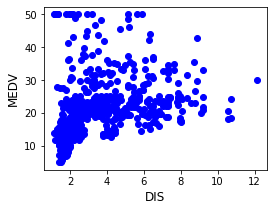

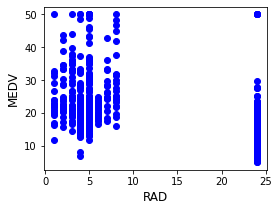

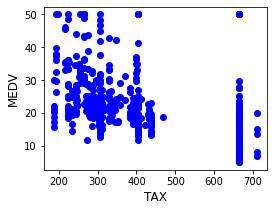

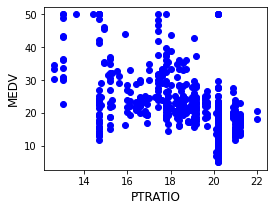

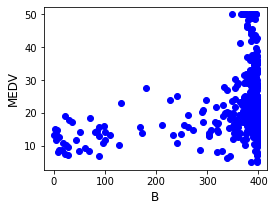

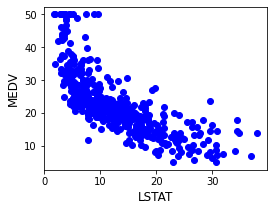

In [110]:
# Get a feel for the boston dataset by creating scatterplots.
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston.data[:, index], boston.target, color="b")
    plt.ylabel('MEDV', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

In [111]:
# Plot a few box plots, which will help us to better visualize
# anomalies and/or outliers in data distribution. 

total_items = len(df.columns)
items_per_row = 5
total_rows = 3

fig = make_subplots(rows=total_rows, cols=items_per_row)

cur_row = 1
cur_col = 1

for index, column in enumerate(df.columns):
    fig.add_trace(go.Box(y=df[column], name=column, line=dict(color="blue") ), row=cur_row, col=cur_col)
    
    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1
    

fig.update_layout(height=800, width=1000,  showlegend=False)
fig.show()

In [112]:
# 70% of the data is uded for training, and 30% for testing.
# Set a random_state seed to allow for reprocibility.

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)

In [113]:
# Perform this normalization by subtracting the mean
# from our data and dividing it by the standard deviation.

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [114]:
# Architecture based on two Dense layers,128 and 64 neurons.
# A dense layer with a linear activation will be used as output layer.

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Total of 10,113 parameters.
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [115]:
# Fit our model with both our features and their labels, for a total 
# amount of 100 epochs, separating 5% of the samples (18 records) as validation set.

history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 582.3058 - mae: 22.3255 - val_loss: 488.0540 - val_mae: 20.4229
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 524.6587 - mae: 20.9098 - val_loss: 412.9025 - val_mae: 18.6361
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 413.8316 - mae: 18.4997 - val_loss: 319.9315 - val_mae: 16.2053
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 368.2433 - mae: 16.9513 - val_loss: 208.8898 - val_mae: 12.9227
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 235.6998 - mae: 13.2339 - val_loss: 105.6882 - val_mae: 9.0952
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 129.7898 - mae: 9.3477 - val_loss: 46.9608 - val_mae: 5.7610
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 74.0395 - mae: 6.5606 - val_loss: 32.7048 - val_mae: 4.6718
Epoch 8/100
11/11 [=============================

11/11 [==============================] - 0s 5ms/step - loss: 9.1516 - mae: 2.0649 - val_loss: 5.7358 - val_mae: 1.7602
Epoch 63/100
11/11 [==============================] - 0s 5ms/step - loss: 7.1414 - mae: 1.9805 - val_loss: 6.1946 - val_mae: 1.8269
Epoch 64/100
11/11 [==============================] - 0s 5ms/step - loss: 8.1964 - mae: 2.0519 - val_loss: 5.6134 - val_mae: 1.7174
Epoch 65/100
11/11 [==============================] - 0s 6ms/step - loss: 7.0295 - mae: 1.9416 - val_loss: 5.8278 - val_mae: 1.7895
Epoch 66/100
11/11 [==============================] - 0s 5ms/step - loss: 7.4612 - mae: 2.0015 - val_loss: 6.1083 - val_mae: 1.8047
Epoch 67/100
11/11 [==============================] - 0s 5ms/step - loss: 7.2564 - mae: 1.9689 - val_loss: 5.9386 - val_mae: 1.8005
Epoch 68/100
11/11 [==============================] - 0s 5ms/step - loss: 8.7629 - mae: 2.0933 - val_loss: 6.4863 - val_mae: 1.8657
Epoch 69/100
11/11 [==============================] - 0s 5ms/step - loss: 8.3151 - mae: 2

In [116]:
# Plotting both loss and mean average error.
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
fig.update_layout(height=500, width=700, xaxis_title='Epoch',yaxis_title='Loss')
fig.show()

In [117]:
# Plotting both loss and mean average error.
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'], name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_mae'],name='Valid'))
fig.update_layout(height=500, width=700, xaxis_title='Epoch', yaxis_title='Mean Absolute Error')
fig.show()

In [118]:
# Evaluate our model.
mse_value, mae_value = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_value)
print('Mean absolute error on test data: ', mae_value)

5/5 [==============================] - 0s 1ms/step - loss: 18.2630 - mae: 2.6360
Mean squared error on test data:  18.26302146911621
Mean absolute error on test data:  2.636000871658325
